# Hands-on Linear Regression

In [ ]:
# Step - 1 ( Importing Libraries )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step - 2 ( Data Loading )
df=pd.read_csv("insurance.csv")
#https://drive.google.com/file/d/1Zvjgv_-2FDi9QtuxT_lzZMLVV05eSYRs/view?usp=sharing
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
# Can i print full data of csv file
print(df.to_string())

       age     sex     bmi  children smoker  Claim_Amount  past_consultations  num_of_steps  Hospital_expenditure  NUmber_of_past_hospitalizations  Anual_Salary     region       charges
0     18.0    male  23.210       0.0     no  29087.543130                17.0      715428.0          4.720921e+06                              0.0  5.578497e+07  southeast   1121.873900
1     18.0    male  30.140       0.0     no  39053.674370                 7.0      699157.0          4.329832e+06                              0.0  1.370089e+07  southeast   1131.506600
2     18.0    male  33.330       0.0     no  39023.627590                19.0      702341.0          6.884861e+06                              0.0  7.352311e+07  southeast   1135.940700
3     18.0    male  33.660       0.0     no  28185.393320                11.0      700250.0          4.274774e+06                              0.0  7.581968e+07  southeast   1136.399400
4     18.0    male  34.100       0.0     no  14697.859410             

In [ ]:
# Step - 3 (EDA - Exploratory Data Analysis )

In [ ]:
df.shape # No of rows , No of columns

(1338, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.543130,17.0,715428.0,4.720921e+06,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.674370,7.0,699157.0,4.329832e+06,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.627590,19.0,702341.0,6.884861e+06,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.393320,11.0,700250.0,4.274774e+06,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.859410,16.0,711584.0,3.787294e+06,0.0,23012320.01,southeast,1137.0110
5,18.0,male,34.43,0.0,no,26488.339120,20.0,717162.0,3.696161e+06,0.0,NaN,southeast,1137.4697
6,18.0,male,37.29,0.0,no,33217.365480,13.0,699159.0,8.765292e+05,0.0,69060665.92,southeast,1141.4451
7,18.0,male,41.14,0.0,no,46770.585330,12.0,706423.0,4.486741e+06,0.0,97193784.44,southeast,1146.7966
8,18.0,male,43.01,0.0,no,9715.650411,17.0,NaN,9.216440e+06,0.0,58881971.93,southeast,1149.3959
9,18.0,male,53.13,0.0,no,17046.585150,19.0,704425.0,1.458972e+06,0.0,94261821.45,southeast,1163.4627


In [ ]:
df.tail(15)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1323,61.0,female,36.385,1.0,yes,57492.40914,35.0,1077227.0,118966096.6,2.0,2.401083e+09,northeast,48517.56315
1324,54.0,male,40.565,3.0,yes,49175.98118,35.0,1086594.0,119144055.3,2.0,2.381944e+09,northeast,48549.17835
1325,60.0,male,40.920,0.0,yes,34684.49466,20.0,1072525.0,117046461.1,2.0,2.431618e+09,southeast,48673.55880
1326,57.0,male,42.130,1.0,yes,71219.04830,20.0,1083241.0,120402998.3,2.0,2.463222e+09,southeast,48675.51770
1327,63.0,female,37.700,0.0,yes,45403.93473,35.0,1085496.0,122180043.2,2.0,2.446348e+09,southwest,48824.45000
1328,44.0,female,38.060,0.0,yes,76028.85348,25.0,1072324.0,122405879.8,2.0,2.430290e+09,southeast,48885.13561
1329,59.0,male,41.140,1.0,yes,53104.92621,38.0,1079931.0,126353660.6,2.0,2.399896e+09,southeast,48970.24760
1330,64.0,male,36.960,2.0,yes,65641.24823,28.0,1091279.0,123627927.0,2.0,2.489508e+09,southeast,49577.66240
1331,28.0,male,36.400,1.0,yes,55590.75527,26.0,1080113.0,144061589.9,2.0,2.682705e+09,southwest,51194.55914
1332,60.0,male,32.800,0.0,yes,77277.98848,40.0,1095960.0,148034634.6,2.0,2.780642e+09,southwest,52590.82939


In [ ]:
'''
Data Cleaning

1) Check for Null / Missing value
2) Check for Duplicate records
3) Check for Outlier
'''

In [ ]:
# 1) Check for Null / Missing value
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
df.isnull().sum().sum()  # Total count of null value in every column of your data

52

**What to do with these 52 null values , Drop them ? Replace them ?**

In [ ]:
'''
If the count of null values is less than 30% of your data - DROP THEM

If the count of null values is more than 30% of your data - REPLACE THEM
'''

In [ ]:
# How to replace the null value in all column
'''
For numerical columns ( Like AGE ) - replace the values with mean or median of that column

For object columns ( Like Gender ) - replace them with mode of that column
'''

In [ ]:
df["sex"].mode()

,sex
0,male


In [ ]:
df["sex"].mode()[0]

'male'

In [ ]:
df["sex"].value_counts()  # This will return the count of values in sex column

,count
sex,
male,676
female,662


In [ ]:
for i in df.columns:
  print(i)

age
sex
bmi
children
smoker
Claim_Amount
past_consultations
num_of_steps
Hospital_expenditure
NUmber_of_past_hospitalizations
Anual_Salary
region
charges


In [ ]:
# Replace
for i in df.columns:
  if df[i].dtype=="object":  # If the data type is object replace with Mode of that column
    df[i]=df[i].fillna(df[i].mode()[0])
  else:
    df[i]=df[i].fillna(df[i].mean())  # If the data type is numerical replace with Mean of that column

In [ ]:
'''
df["age"]=df["age"].fillna(df["age"].mode()[0])

df["age"]=df["age"].fillna(df["age"].mean())
'''

In [ ]:
df.isnull().sum().sum()  # Total count of null value in every column of your data

0

In [ ]:
# If you want to Drop Null values you can use this code
df.dropna(inplace=True)  # inplace=True to make permanent changes in our data

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# 2) Check for Duplicate records
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
df.duplicated().sum()  # this will return me the count of rows which are having duplicate records

0

In [ ]:
# What if we have duplicare record how to delete them
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

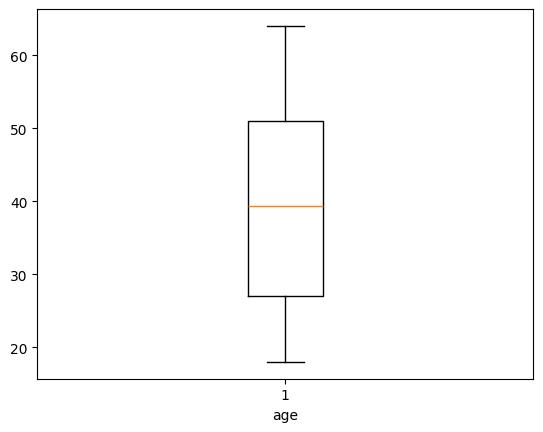

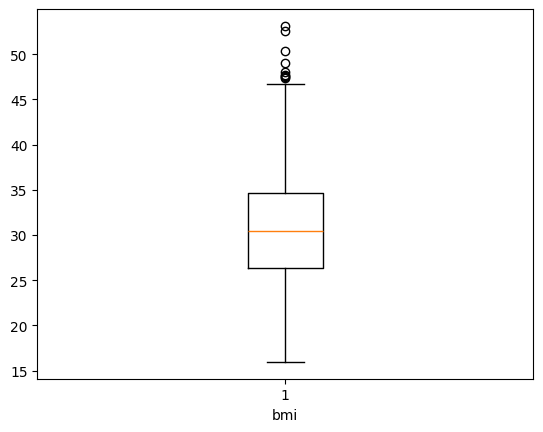

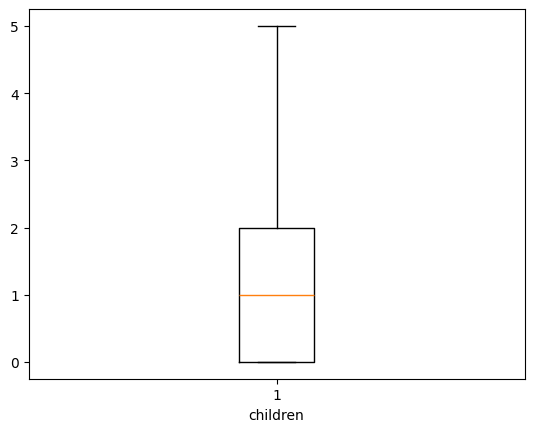

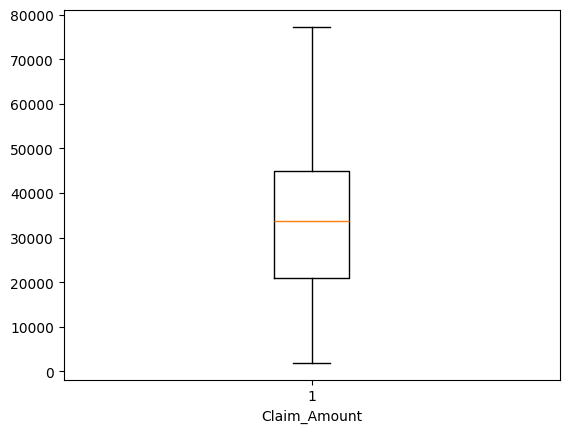

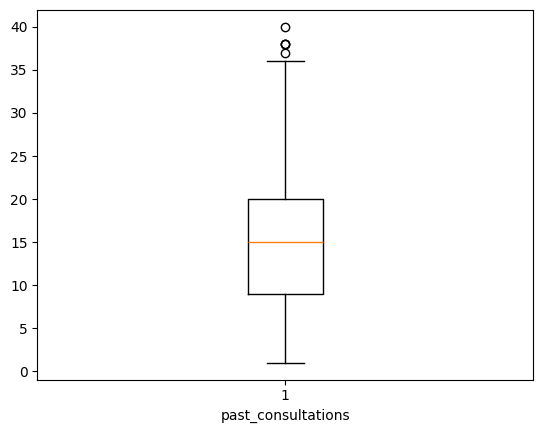

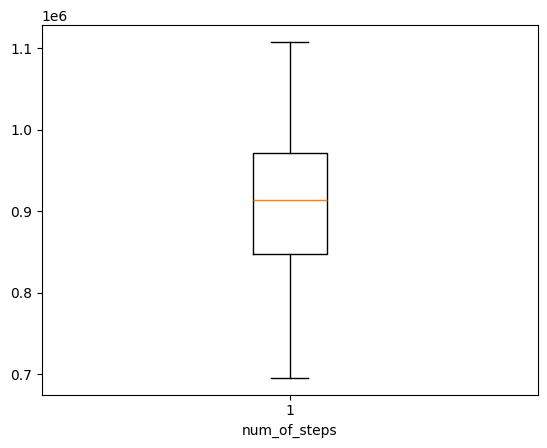

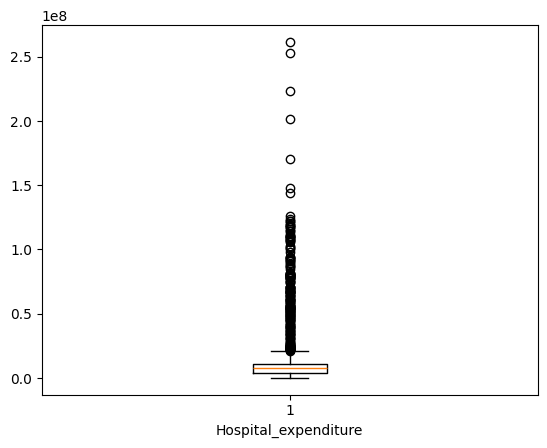

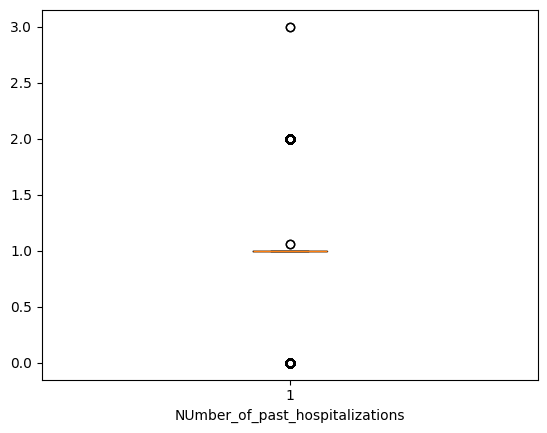

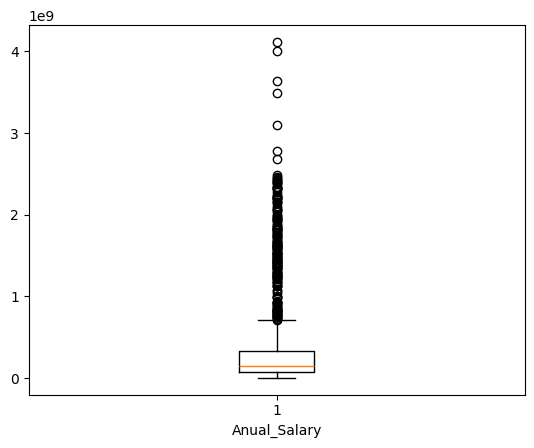

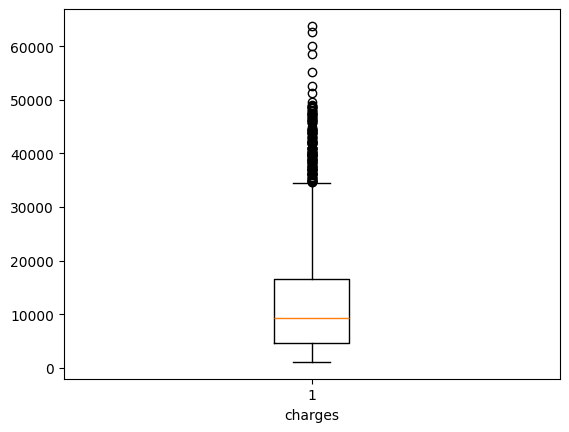

In [ ]:
# 3) Check for Outlier  ( Use Box plot to check outliers )
for i in df.columns:
  if (df[i].dtypes=="int64" or df[i].dtypes=="float64"):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
# Lets treat the outliers
list1=["bmi" , "past_consultations","Hospital_expenditure" , "Anual_Salary", "NUmber_of_past_hospitalizations"]

In [ ]:
for i in list1:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR= Q3-Q1
  Upper_fence= Q3+1.5*IQR
  Lower_fence= Q1-1.5*IQR
  df=df[ (df[i]>= Lower_fence) & (df[i]<=Upper_fence)]  # Only consider that data which is present between Upper and Lower Fence

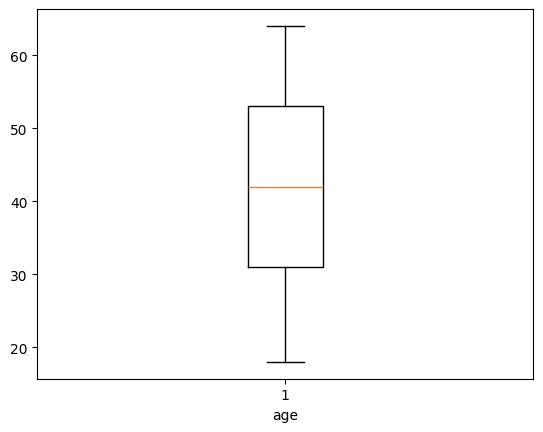

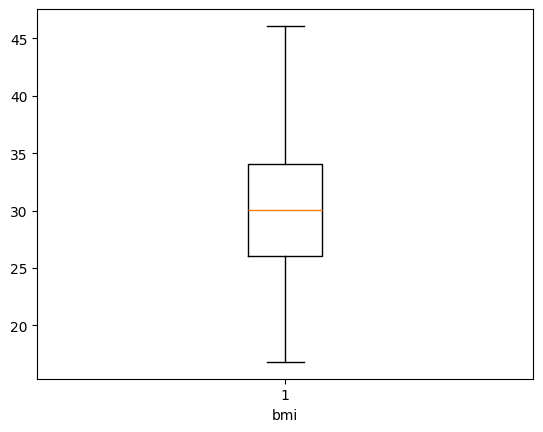

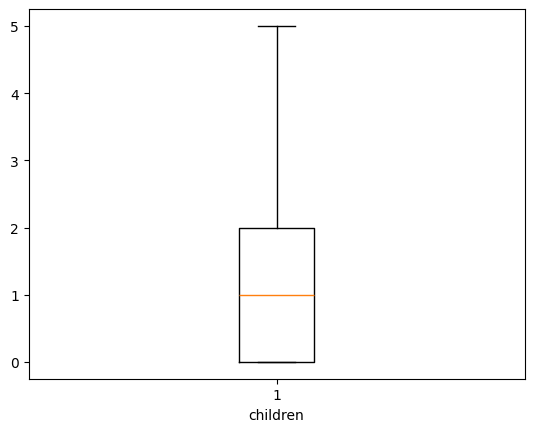

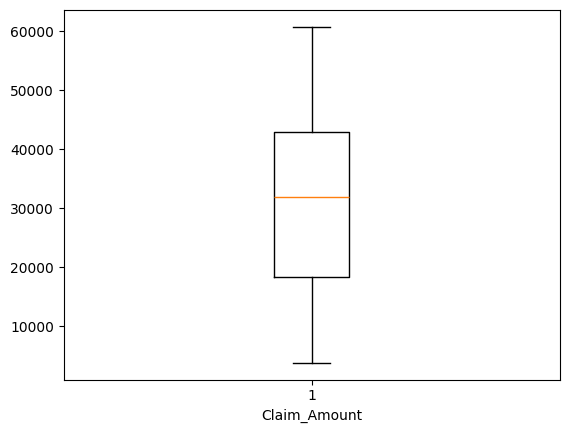

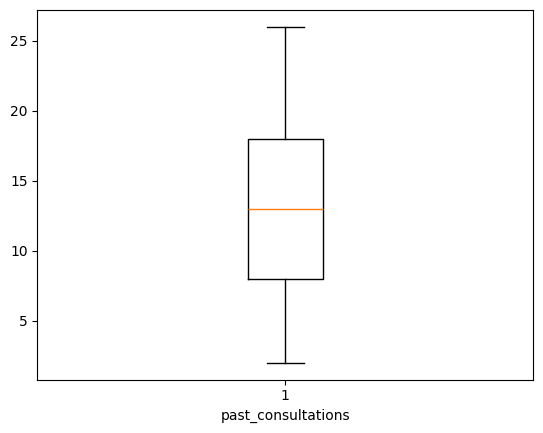

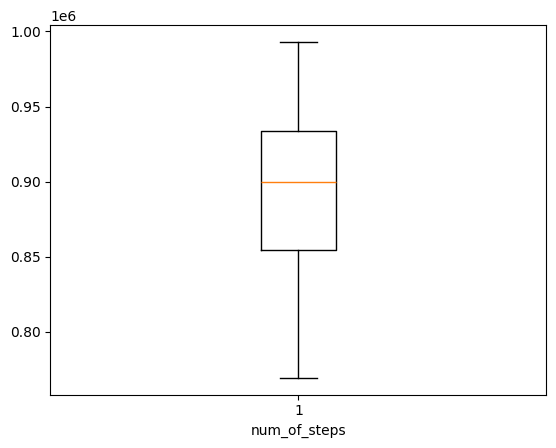

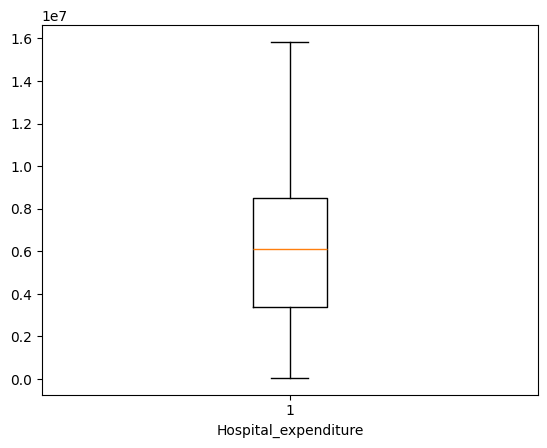

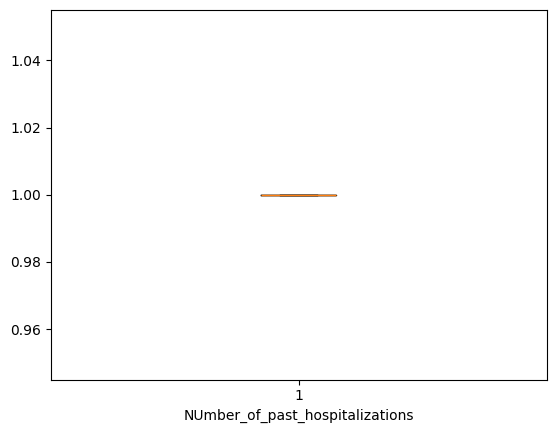

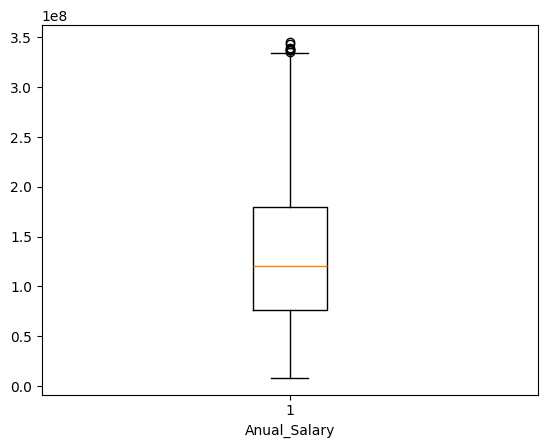

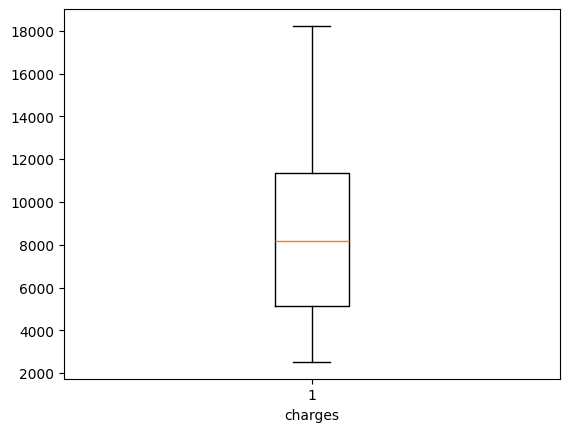

In [ ]:
for i in df.columns:
  if (df[i].dtypes=="int64" or df[i].dtypes=="float64"):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [ ]:
df.shape

(855, 13)

In [ ]:
1338-855  # We lost 483 records

483

In [ ]:
# Clean data
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,32.0,female,23.650,1.0,no,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,southeast,17626.23951
1019,28.0,male,23.980,3.0,yes,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,southeast,17663.14420
1021,25.0,female,41.325,0.0,no,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,northeast,17878.90068
1024,21.0,male,25.700,4.0,yes,23327.30277,14.0,974525.0,8.800807e+06,1.0,3.333838e+08,southwest,17942.10600


# Label Encoding

My machine only understand columns with numerical column so i need to trasnform all object data type column to numerical column

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
  if df[i].dtype=="object":  # Access all the object data type column and apply label encoding to them
    df[i]= le.fit_transform(df[i])

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1,2523.16950
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1,2527.81865
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1,2534.39375
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2,2566.47070
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,32.0,0,23.650,1.0,0,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,2,17626.23951
1019,28.0,1,23.980,3.0,1,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,2,17663.14420
1021,25.0,0,41.325,0.0,0,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,0,17878.90068
1024,21.0,1,25.700,4.0,1,23327.30277,14.0,974525.0,8.800807e+06,1.0,3.333838e+08,3,17942.10600


# Model Building

In [ ]:
# Divide the data into x and y ( Independent variables and Dependent variablr)

x=df.drop(columns=["charges"])  # Independent columns

y=df["charges"]  # Dependent column / Target column

In [ ]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,32.0,0,23.650,1.0,0,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08,2
1019,28.0,1,23.980,3.0,1,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08,2
1021,25.0,0,41.325,0.0,0,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08,0
1024,21.0,1,25.700,4.0,1,23327.30277,14.0,974525.0,8.800807e+06,1.0,3.333838e+08,3


In [ ]:
y

,charges
151,2523.16950
152,2527.81865
153,2534.39375
154,2566.47070
155,2585.26900
...,...
1018,17626.23951
1019,17663.14420
1021,17878.90068
1024,17942.10600


In [ ]:
'''
x= Featurs / Independent columns
y= Target / Dependent columns

Train =  Data For Model Training
Test = Data For Model Testing


x_train= Independent columns of Training
y_train= Dependent columns of Training

x_test= Independent columns of Testing
y_test = Dependent columns of Testing

'''

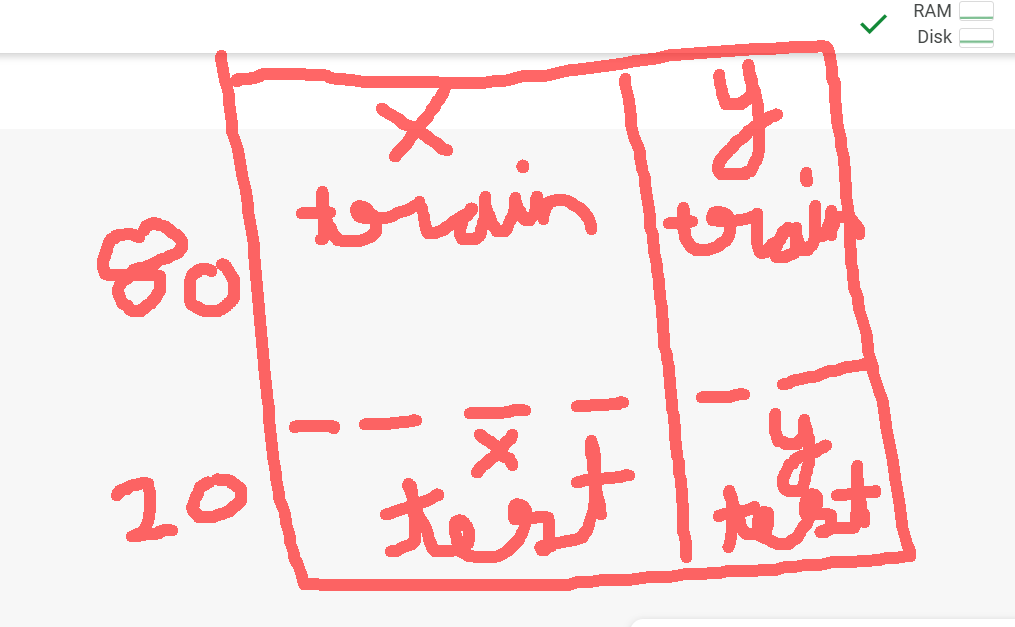

In [ ]:
from sklearn.model_selection import train_test_split  # To divide the data into training and testing data

x_train , x_test , y_train , y_test = train_test_split (x,y , test_size=0.2  ,random_state =0 )

In [ ]:
# TRAINING  DATA
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
560,45.0,0,35.815,0.0,0,29622.261030,6.0,886052.0,7.579867e+06,1.0,1.589946e+08,1
779,56.0,0,39.820,0.0,0,28716.572060,22.0,942062.0,8.381702e+06,1.0,1.957085e+08,2
274,32.0,1,30.030,1.0,0,43401.742190,5.0,830624.0,4.201349e+06,1.0,3.759144e+07,2
1024,21.0,1,25.700,4.0,1,23327.302770,14.0,974525.0,8.800807e+06,1.0,3.333838e+08,3
319,18.0,0,31.350,4.0,0,49387.265680,21.0,852456.0,6.722424e+06,1.0,3.013997e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,29.0,1,22.895,0.0,1,12674.252090,20.0,954474.0,1.131598e+07,1.0,3.091118e+08,0
345,30.0,1,31.570,3.0,0,8732.959886,14.0,840738.0,7.063041e+05,1.0,5.178025e+07,2
786,53.0,1,28.600,3.0,0,13698.957130,20.0,944051.0,1.081429e+07,1.0,1.651676e+08,3
716,46.0,1,25.800,5.0,0,16042.470500,14.0,928476.0,7.993621e+06,1.0,1.034678e+08,3


In [ ]:
y_train

,charges
560,7731.85785
779,11090.71780
274,4074.45370
1024,17942.10600
319,4561.18850
...,...
995,16138.76205
345,4837.58230
786,11253.42100
716,10096.97000


In [ ]:
# TESTING DATA
x_test

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
606,45.0,0,28.600,2.0,0,12542.231050,17.0,916002.0,6.652674e+06,1.0,1.347243e+08,2
464,38.0,1,29.260,2.0,0,18078.046080,17.0,876500.0,7.567064e+06,1.0,6.583957e+07,1
823,34.0,1,27.000,2.0,0,47842.838930,18.0,928674.0,5.529792e+06,1.0,2.174552e+08,3
459,35.0,0,23.465,2.0,0,7728.536499,12.0,861590.0,1.000189e+07,1.0,1.234067e+08,0
841,58.0,1,30.305,0.0,0,31405.793590,12.0,939497.0,9.380141e+06,1.0,2.118739e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
308,32.0,1,27.835,1.0,0,22598.018760,20.0,845258.0,9.008646e+06,1.0,1.141335e+08,1
650,45.0,0,25.175,2.0,0,9920.458795,16.0,916392.0,4.746549e+06,1.0,8.737575e+07,0
802,52.0,0,38.380,2.0,0,12992.139950,24.0,933863.0,4.075903e+06,1.0,2.061268e+08,0
202,26.0,0,22.230,0.0,0,22630.605250,9.0,820196.0,5.490229e+06,1.0,1.642620e+07,1


In [ ]:
y_test

,charges
606,8516.82900
464,6457.84340
823,11737.84884
459,6402.29135
841,11938.25595
...,...
308,4454.40265
650,9095.06825
802,11396.90020
202,3176.28770


**Lets build our Linear Regression model and train it**

In [ ]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

In [ ]:
# Train the model by passing training data ( Both feature and target so model can learn the pattern)

model1.fit(x_train , y_train)

LinearRegression()

In [ ]:
# Test the model by using testing data which is unseen by model ( So pass some new features from it and ask the model to predict target)
predicted_value = model1.predict(x_test)

In [ ]:
# Predicted charges value given by my model
predicted_value

array([ 9621.5546957 ,  6434.68155536, 11215.60954661,  6726.08280059,
       12218.70653572, 13536.76245411,  2903.45433671, 14228.59956178,
        8125.56886282,  3996.32223619, 12497.02408192,  5818.14776606,
       12283.5303294 , 10085.42238245, 16858.30365727, 12129.98931753,
        8796.90425273,  8035.33370928,  9055.61169561, 11619.10753111,
        8601.32160436,  9374.53653043, 10639.51917052,  5674.30029421,
       11794.50743096,  7553.25442012,  2848.36017936, 11277.62740032,
        6994.5728097 , 10586.13613177,  4000.99269716,  8796.5066172 ,
       12483.5681116 , 12029.26374392,  4622.99731565,  8621.23300848,
        2493.25905677,  6178.681757  ,  2539.80643926, 10677.57900302,
       11544.66141332,  3620.9875294 ,  8915.79739401, 15041.08640593,
        7420.3841793 ,  7303.08446237, 10446.42475781,  4654.83275188,
        2534.78099336, 11825.67772977,  5719.87510397, 10832.16629543,
        9936.97287721,  7378.61515197, 11372.0389218 ,  2568.26619192,
      

In [ ]:
# Actual charges
y_test

,charges
606,8516.82900
464,6457.84340
823,11737.84884
459,6402.29135
841,11938.25595
...,...
308,4454.40265
650,9095.06825
802,11396.90020
202,3176.28770


In [ ]:
# Evaluate the performance of the model how well it is predicting
from sklearn.metrics import *
print(r2_score(y_test , predicted_value )*100)

95.84734091494057


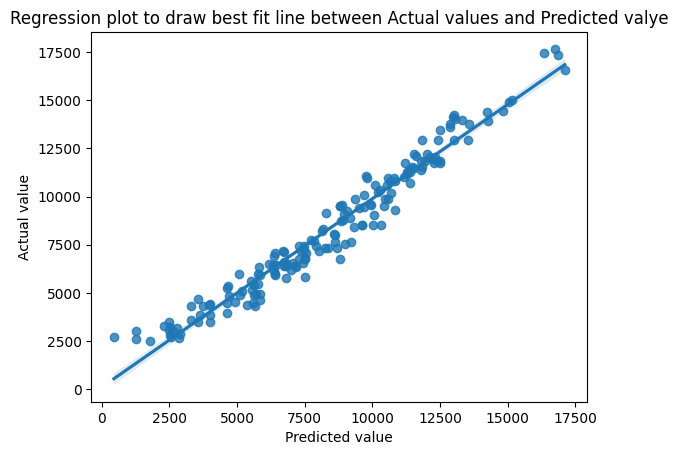

In [ ]:
# regplot is Regression plot to draw best fit line between Actual values and Predicted valye
sns.regplot(x=predicted_value , y =y_test)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Regression plot to draw best fit line between Actual values and Predicted valye")
plt.show()

In [ ]:
# how to pass a new data from user and ask your model to make the prediction of charges

user_data = pd.DataFrame([{'age':25.0, 'sex':1, 'bmi':27.550, 'children':0.0, 'smoker':0, 'Claim_Amount':39148.95495,
       'past_consultations':10.0, 'num_of_steps':780652.0, 'Hospital_expenditure':8.614147e+06,
       'NUmber_of_past_hospitalizations':1.0, 'Anual_Salary':5.452601321314, 'region':2}])

user_data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,25.0,1,27.55,0.0,0,39148.95495,10.0,780652.0,8614147.0,1.0,5.452601,2


In [ ]:
ans = model1.predict(user_data)
ans

array([482.67295643])